In [0]:
#!unzip air-pollution-in-seoul.zip

In [32]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [34]:
# Retriving data for station code 102 for SO2
data_102=data[(data['Station code']==102) & (data['SO2']>0)]
print(len(data_102))
print(data_102.head(10))

25827
       Measurement date  Station code  ...  PM10  PM2.5
25905  2017-01-01 00:00           102  ...  77.0   63.0
25906  2017-01-01 01:00           102  ...  76.0   63.0
25907  2017-01-01 02:00           102  ...  73.0   57.0
25908  2017-01-01 03:00           102  ...  67.0   55.0
25909  2017-01-01 04:00           102  ...  66.0   54.0
25910  2017-01-01 05:00           102  ...  66.0   55.0
25911  2017-01-01 06:00           102  ...  70.0   56.0
25912  2017-01-01 07:00           102  ...  69.0   58.0
25913  2017-01-01 08:00           102  ...  70.0   55.0
25914  2017-01-01 09:00           102  ...  73.0   55.0

[10 rows x 11 columns]


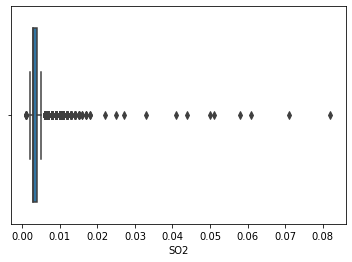

In [35]:
import seaborn as sns
sns.boxplot(data_102['SO2'])

25532


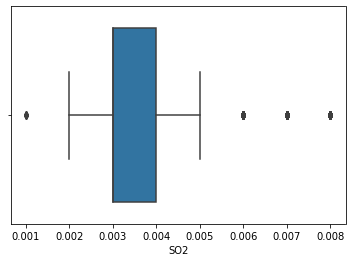

In [36]:
from scipy import stats
z = np.abs(stats.zscore(data_102['SO2']))
threshold = 3
#print(len(np.where(z > 3)))
data_102_Rout = data_102[(z < 3)]
print(len(data_102_Rout))
sns.boxplot(data_102_Rout['SO2'])

In [37]:
df=data_102_Rout['SO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25532, 1)


In [38]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.001] [0.008]
25532
0.0 1.0000000000000002


In [39]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25527 [0.7142857142857143, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.4285714285714286]


In [40]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25527, 5)


,x1,x2,x3,x4,y
0,0.714286,0.714286,0.571429,0.571429,0.428571
1,0.714286,0.571429,0.571429,0.428571,0.428571
2,0.571429,0.571429,0.428571,0.428571,0.571429
3,0.571429,0.428571,0.428571,0.571429,0.428571
4,0.428571,0.428571,0.571429,0.428571,0.571429
5,0.428571,0.571429,0.428571,0.571429,0.571429
6,0.571429,0.428571,0.571429,0.571429,0.571429
7,0.428571,0.571429,0.571429,0.571429,0.571429
8,0.571429,0.571429,0.571429,0.571429,0.571429
9,0.571429,0.571429,0.571429,0.571429,0.714286


In [41]:
print(matrix[:,4])

[[0.42857143]
 [0.42857143]
 [0.57142857]
 ...
 [0.28571429]
 [0.14285714]
 [0.14285714]]


In [42]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8424, 1) [[0.29232988]
 [0.29232988]
 [0.29232988]
 [0.45148986]
 [0.29232988]]


In [43]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.7795304090677428
[0.03076815]
[[0.0629977  0.03605592 0.09960021 0.71681221]]


In [44]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.006716463392115988
absolute mean error :  0.05266413536898799
0.7836899637008178


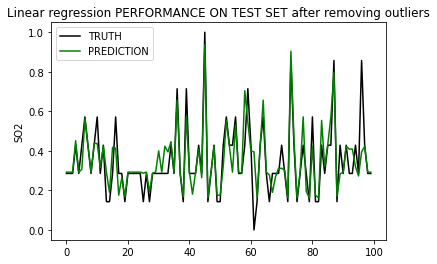

In [45]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('SO2')
plt.legend()
plt.show()

(25827, 1)
[0.001] [0.082]
25827
0.0 1.0
25822 [0.061728395061728406, 0.061728395061728406, 0.04938271604938273, 0.04938271604938273, 0.03703703703703704]
(8522, 1) [[0.04255431]
 [0.0946258 ]
 [0.0260293 ]
 [0.05275381]
 [0.03610826]]
mean squared eror :  0.0004007929175923078
absolute mean error :  0.006364546355567875
0.33633219395132474


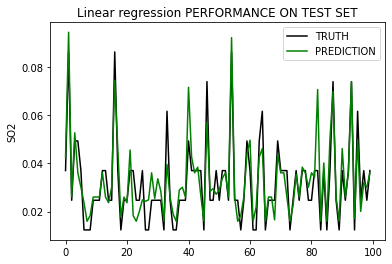

In [46]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_102['SO2']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [47]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.00040079351433159157
absolute mean error :  0.0063650893176473875
0.33633120581846654


In [48]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.00036274844835325055
absolute mean error :  0.0052922328495392
0.3993295382752955


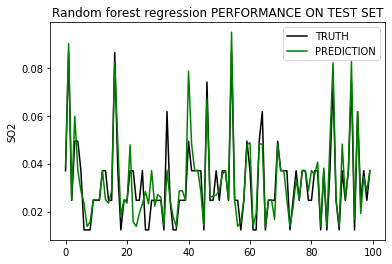

truth :  [[0.03703704]
 [0.08641975]
 [0.02469136]
 [0.04938272]
 [0.04938272]
 [0.03703704]
 [0.01234568]
 [0.01234568]
 [0.01234568]
 [0.02469136]]
prediction :  [0.0386664  0.09008614 0.02491836 0.05978257 0.0371326  0.02865141
 0.0235522  0.01383641 0.0156809  0.02491836]


In [49]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [50]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.00040195351711097923
0.006579302974097634
0.33441037222631786


In [51]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0004223287389816348
absolute mean error :  0.004752589327579325
0.30067130598261715


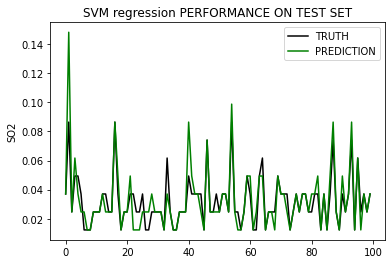

In [52]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [53]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
17300/17300 [==============================] - 1s 76us/step - loss: 0.0014 - accuracy: 2.8902e-04
Epoch 2/100
17300/17300 [==============================] - 1s 69us/step - loss: 0.0014 - accuracy: 2.8902e-04
Epoch 3/100
17300/17300 [==============================] - 1s 70us/step - loss: 0.0014 - accuracy: 2.8902e-04
Epoch 4/100
17300/17300 [==============================] - 1s 70us/step - loss: 0.0014 - accuracy: 2.8902e-04
Epoch 5/100
17300/17300 [==============================] - 1s 70us/step - loss: 0.0014 - accuracy: 2.8902e-04
Epoch 6/100
17300/17300 [==============================] - 1s 69us/step - loss: 0.0014 - accuracy: 2.8902e-04
Epoch 7/100
17300/17300 [==============================] - 1s 71us/step - loss: 0.0014 - accuracy: 2.8902e-04
Epoch 8/100
17300/17300 [==============================] - 1s 68us/step - loss: 0.0014 - accuracy: 2.8902e-04
Epoch 9/100
17300/17300 [==============================] - 1s 66us/step - loss: 0.0014 - accuracy: 2.8902e-04
Epoch 10/1

dict_keys(['loss', 'accuracy'])


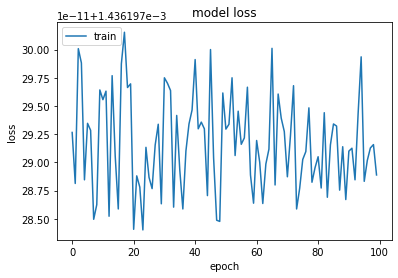

mean squared error :  0.001632916459513899
mean absolute error :  0.004752589327579325
0.30067130598261715


In [54]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


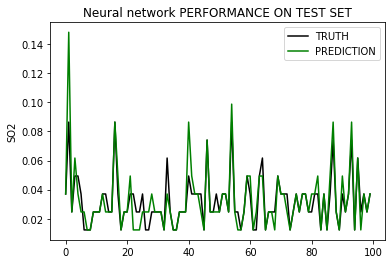

In [55]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [56]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.04938272 0.0617284  0.0617284  0.04938272]
 [0.01234568 0.01234568 0.01234568 0.02469136]
 [0.02469136 0.02469136 0.03703704 0.03703704]
 ...
 [0.04938272 0.04938272 0.04938272 0.03703704]
 [0.03703704 0.03703704 0.03703704 0.03703704]
 [0.02469136 0.02469136 0.02469136 0.03703704]]
(17300, 4)
(17300, 4, 1)


In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17300/17300 [==============================] - 8s 449us/step - loss: 2.8282e-04
Epoch 2/100
17300/17300 [==============================] - 6s 367us/step - loss: 2.1788e-04
Epoch 3/100
17300/17300 [==============================] - 6s 370us/step - loss: 1.7445e-04
Epoch 4/100
17300/17300 [==============================] - 6s 371us/step - loss: 1.6688e-04
Epoch 5/100
17300/17300 [==============================] - 6s 366us/step - loss: 1.6056e-04
Epoch 6/100
17300/17300 [==============================] - 6s 367us/step - loss: 1.5467e-04
Epoch 7/100
17300/17300 [==============================] - 6s 365us/step - loss: 1.5161e-04
Epoch 8/100
17300/17300 [==============================] - 6s 366us/step - loss: 1.5309e-04
Epoch 9/100
17300/17300 [==============================] - 6s 375us/step - loss: 1.4768e-04
Epoch 10/100
17300/17300 [==============================] - 6s 373us/step - loss: 1.4922e-04
Epoch 11/100
17300/17300 [==============================] - 6s 372us/step - los

dict_keys(['loss'])


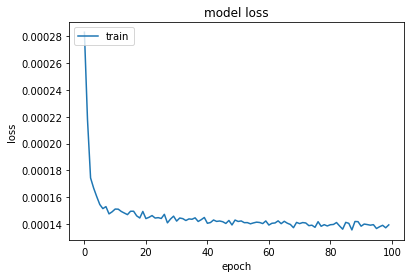

mean square error : 0.00036572268157683124
mean absolute error :  0.007789758783431871
0.3944045439664421


In [58]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

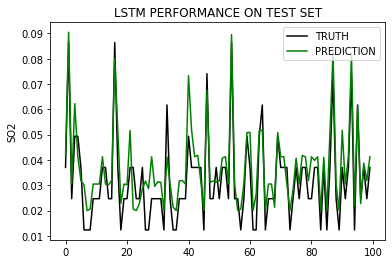

In [59]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('SO2')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')